In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
! pip install langdetect
from langdetect import detect 

In [2]:
df = pd.read_csv('CSVFiles/training-data-positive-and-negative-sentiment-english.csv')

In [3]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,Date,text,Sentiment
0,2019-05-27,È appena uscito un nuovo video! LES CRYPTOMONN...,Positive
1,2019-05-27,Cardano: Digitize Currencies; EOS https://t.co...,Positive
2,2019-05-27,Another Test tweet that wasn't caught in the s...,Positive
3,2019-05-27,Current Crypto Prices! \n\nBTC: $8721.99 USD\n...,Positive
4,2019-05-27,Spiv (Nosar Baz): BITCOIN Is An Asset &amp; NO...,Positive


In [4]:
# for row, index in df['text'].iteritems():
#     try:
#         lang = detect(str(row))
#         if lang == "en":
#             df = df.drop(row)
#     except:
#         df = df.drop(row)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59500 entries, 0 to 59499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       59500 non-null  object
 1   text       59500 non-null  object
 2   Sentiment  59500 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


Text(0.5, 0, 'Sentiment Score')

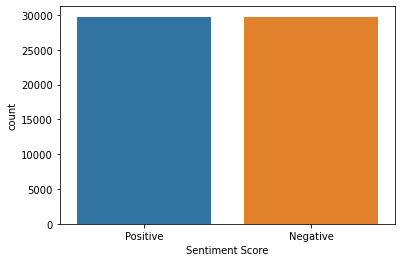

In [6]:
sns.countplot(x=df.Sentiment)
plt.xlabel('Sentiment Score')
# df = df.sample(n=10000, ignore_index=True)
# df.to_csv('CSVFiles/training-data-positive-negative.csv')

In [7]:
# since there are no neutral tweets in our training data, we got some from Kaggle 
df1 = pd.read_csv('CSVFiles/bitcointweets.csv')
df1.info

<bound method DataFrame.info of        Fri Mar 23 00:40:32 +0000 2018  \
0      Fri Mar 23 00:40:34 +0000 2018   
1      Fri Mar 23 00:40:35 +0000 2018   
2      Fri Mar 23 00:40:36 +0000 2018   
3      Fri Mar 23 00:40:36 +0000 2018   
4      Fri Mar 23 00:40:36 +0000 2018   
...                               ...   
50853  Fri Mar 23 08:55:16 +0000 2018   
50854  Fri Mar 23 08:55:17 +0000 2018   
50855  Fri Mar 23 08:55:18 +0000 2018   
50856  Fri Mar 23 08:55:19 +0000 2018   
50857  Fri Mar 23 08:55:19 +0000 2018   

                                                    text   myresumerocket  \
0      @lopp @_Kevin_Pham @psycho_sage @naval But @Pr...         BitMocro   
1      RT @tippereconomy: Another use case for #block...     hojachotopur   
2                     free coins https://t.co/DiuoePJdap    denies_distro   
3      RT @payvxofficial: WE are happy to announce th...       aditzgraha   
4      Copy successful traders automatically with Bit...  VictorS61164810   
...          

In [8]:
df1 = df1.iloc[:,[1,7]]
df1 = df1.loc[(df1["Sentiment"]=="['positive']") | (df1["Sentiment"]=="['negative']")]
df1.reset_index(drop=True)

,text,Sentiment
0,RT @tippereconomy: Another use case for #block...,['positive']
1,free coins https://t.co/DiuoePJdap,['positive']
2,RT @payvxofficial: WE are happy to announce th...,['positive']
3,Copy successful traders automatically with Bit...,['positive']
4,RT @bethereumteam: We're revealing our surpris...,['positive']
...,...,...
28915,RT @coindesk: Coinbase Is In Talks to Buy One ...,['positive']
28916,RT @fixy_app: Fixy Network brings popular cryp...,['positive']
28917,RT @bethereumteam: After a successful launch o...,['positive']
28918,I added a video to a @YouTube playlist https:/...,['positive']


In [9]:
df1=df1.assign(Sentiment='Neutral')

In [10]:
df1.tail()

,text,Sentiment
50851,RT @coindesk: Coinbase Is In Talks to Buy One ...,Neutral
50853,RT @fixy_app: Fixy Network brings popular cryp...,Neutral
50854,RT @bethereumteam: After a successful launch o...,Neutral
50856,I added a video to a @YouTube playlist https:/...,Neutral
50857,RT @Raybambs: Airdrop PhotoCoin Airdrop Round#...,Neutral


In [11]:
df = pd.concat([df,df1], ignore_index=True)

Text(0.5, 0, 'Sentiment Score')

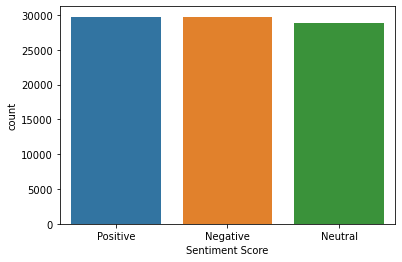

In [12]:
sns.countplot(x=df.Sentiment)
plt.xlabel('Sentiment Score')

In [13]:
df.tail()

,Date,text,Sentiment
88415,NaN,RT @coindesk: Coinbase Is In Talks to Buy One ...,Neutral
88416,NaN,RT @fixy_app: Fixy Network brings popular cryp...,Neutral
88417,NaN,RT @bethereumteam: After a successful launch o...,Neutral
88418,NaN,I added a video to a @YouTube playlist https:/...,Neutral
88419,NaN,RT @Raybambs: Airdrop PhotoCoin Airdrop Round#...,Neutral


In [14]:
df[df['Sentiment']=='Positive'].count().Sentiment

29741

In [15]:
df[df['Sentiment']=='Negative'].count().Sentiment

29759

In [16]:
df[df['Sentiment']=='Neutral'].count().Sentiment

28920

In [17]:
dfpos = df[df['Sentiment']=='Positive']
dfneg = df[df['Sentiment']=='Negative']
dfneu = df[df['Sentiment']=='Neutral']

In [18]:
# now select 10,000 tweets with positive/negative/neutral ratio of 36/36/28 
dfpos = dfpos.sample(n=3600, ignore_index=True)
dfneg = dfneg.sample(n=3600, ignore_index=True)
dfneu = dfneu.sample(n=2800, ignore_index=True)

In [19]:
df = pd.concat([dfpos, dfneg, dfneu], ignore_index=True)
df.tail()

,Date,text,Sentiment
9995,NaN,Copy successful traders automatically with Bit...,Neutral
9996,NaN,join this best airdrop \n(https://t.co/41hmY7I...,Neutral
9997,NaN,RT @RandolphMlny: #Bitcoin #Satoshi #crypto #b...,Neutral
9998,NaN,"RT @stephanlivera: To understand bitcoin, you ...",Neutral
9999,NaN,"first speaker @Satoshis_Vision @digitsu\n\n""wh...",Neutral


In [20]:
df.to_csv('CSVFiles/training-data.csv')